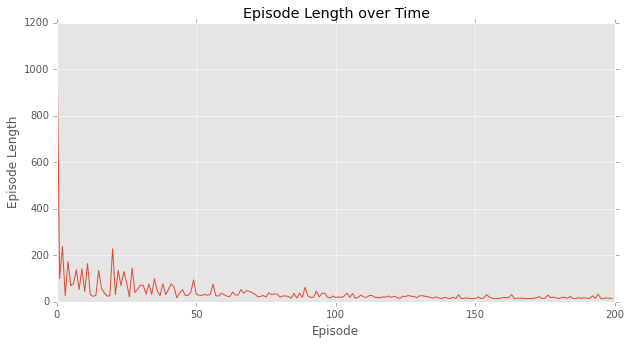

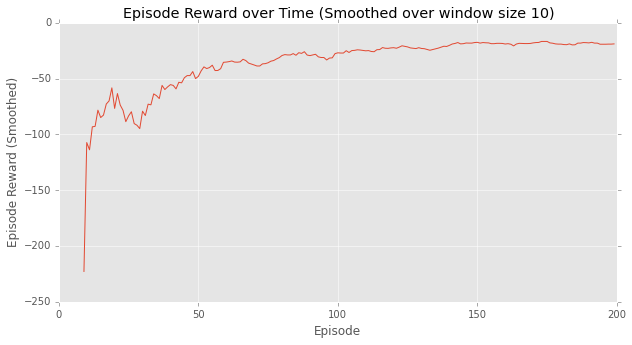

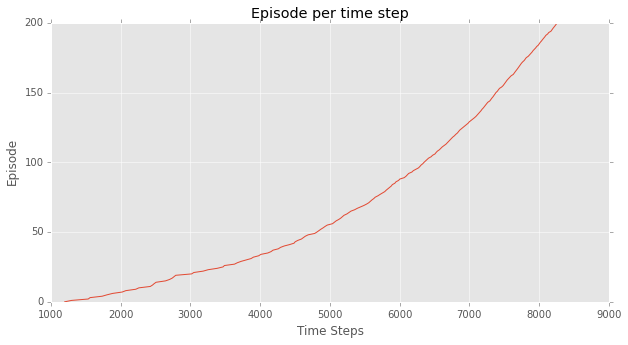

(<matplotlib.figure.Figure at 0x114a64fd0>,
 <matplotlib.figure.Figure at 0x114b558d0>)

In [2]:
%matplotlib inline
import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd

from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting

matplotlib.style.use('ggplot')

env = WindyGridworldEnv()

def make_epsilon_greedy_policy(Q, epsilon, nA):
    def policy_fn(state):
        probs = np.ones(nA, dtype=float)*epsilon/nA
        best_action = np.argmax(Q[state])
        probs[best_action] += (1.0-epsilon)
        return probs
    
    return policy_fn

def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    stats = plotting.EpisodeStats(episode_lengths=np.zeros(num_episodes),episode_rewards=np.zeros(num_episodes))
    
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        for t in itertools.count():
            next_state, reward, done, _ = env.step(action)
            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
            td_target = reward + discount_factor*Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha*td_delta
            
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            if done:
                break
                
            action = next_action
            state = next_state
            
    return Q, stats

Q, stats = sarsa(env, 200)
plotting.plot_episode_stats(stats)